In [118]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text  import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [93]:
df = pd.read_csv('IMDB Dataset.csv')


In [94]:
df.columns


Index(['review', 'sentiment', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [95]:
df.isna().sum()

,0
review,0
sentiment,0
Unnamed: 2,49955
Unnamed: 3,49986
Unnamed: 4,49997
Unnamed: 5,49999
Unnamed: 6,49999
Unnamed: 7,49999


In [96]:
df.shape

(50000, 8)

In [97]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]

In [98]:
print(df.shape)

(50000, 2)


In [99]:
df=df[df['sentiment'].isin(['positive','negative'])]
df=df[['review','sentiment']].dropna()
print(df['sentiment'].unique())
print(df.isnull().sum())


['positive' 'negative']
review       0
sentiment    0
dtype: int64


In [100]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def cleantext(text):
  text=re.sub(r'<.*?>'," ",text)
  text=re.sub(r'[^a-zA-Z]'," ",text)
  text=text.lower()
  text=text.split()
  text=[word for word in text if word not in stop_words]
  return " ".join(text)

In [102]:
df['clean_reviews']=df['review'].apply(cleantext)

In [103]:
df['clean_reviews']

,clean_reviews
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter mattei love time money visually stunnin...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,going disagree previous comment side maltin on...


In [104]:
def get_n_words(reviews,n=20):
  vec=CountVectorizer().fit(reviews)
  bag=vec.transform(reviews)
  word_freq=bag.sum(axis=0)
  word_freq=[(word,word_freq[0,idx]) for word,idx in vec.vocabulary_.items()]
  return sorted(word_freq,key=lambda x:x[1],reverse=True)[:n]

In [105]:
positiveReviews=df[df['sentiment']=='positive']['clean_reviews']

In [106]:
negativeReviews=df[df['sentiment']=='negative']['clean_reviews']

In [107]:
topPositiveWords=get_n_words(positiveReviews)
topNegativeWords=get_n_words(negativeReviews)

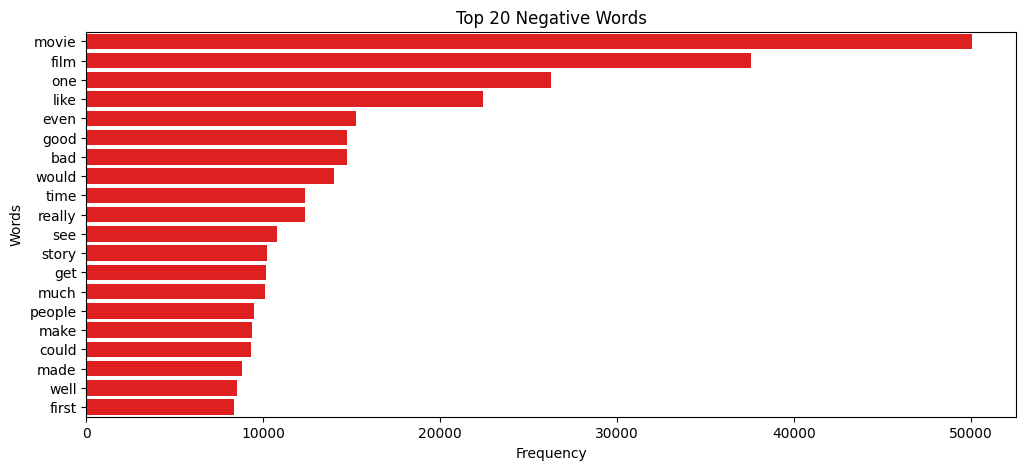

In [108]:
plt.figure(figsize=(12, 5))
sns.barplot(x=[x[1] for x in topNegativeWords],y=[x[0] for x in topNegativeWords],color='red')
plt.title('Top 20 Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Text(0, 0.5, 'Words')

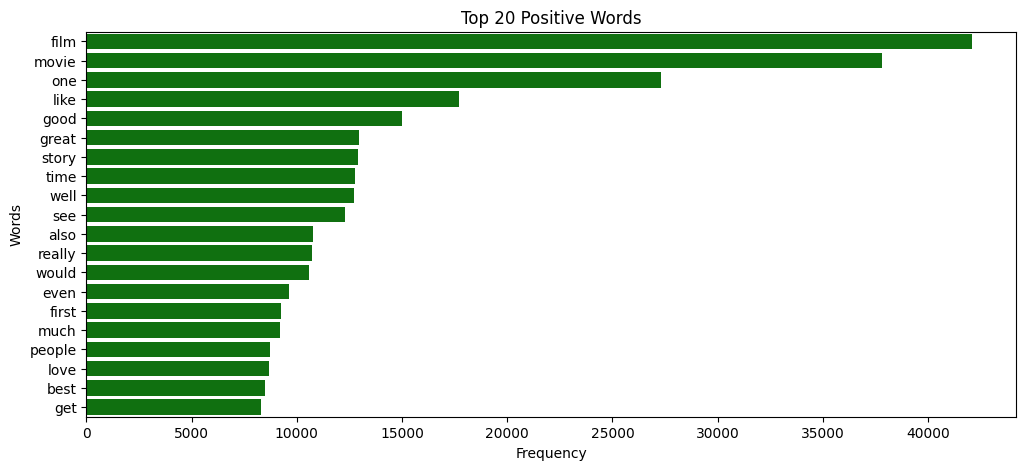

In [109]:
plt.figure(figsize=(12,5))
sns.barplot(x=[x[1] for x in topPositiveWords],y=[x[0] for x in topPositiveWords],color='green')
plt.title('Top 20 Positive Words')
plt.xlabel("Frequency")
plt.ylabel("Words")

In [110]:
df['label']=df['sentiment'].map({'positive':1,'negative':0})


In [111]:
vectorizer=TfidfVectorizer(max_features=5000)
X=vectorizer.fit_transform(df['clean_reviews']).toarray()
y=df['label']

In [112]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [114]:
nb_predicted=nb.predict(X_test)

In [115]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_predicted=lr.predict(X_test)

In [119]:
print("Naive Bayes Accuracy: ",accuracy_score(y_test,nb_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,lr_predicted))

Naive Bayes Accuracy:  0.8492643379041137
Logistic Regression Accuracy:  0.8727354619157242


In [121]:
print("Naive Bayes Classification\n",classification_report(y_test,nb_predicted))

Naive Bayes Classification
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     20023
           1       0.84      0.86      0.85     19941

    accuracy                           0.85     39964
   macro avg       0.85      0.85      0.85     39964
weighted avg       0.85      0.85      0.85     39964



In [122]:
print("Logistic Regression Classification\n",classification_report(y_test,lr_predicted))

Logistic Regression Classification
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     20023
           1       0.86      0.89      0.88     19941

    accuracy                           0.87     39964
   macro avg       0.87      0.87      0.87     39964
weighted avg       0.87      0.87      0.87     39964

